# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = [
    "/kaggle/input/occupancy-detection-data-set-uci/datatest.txt",
    "/kaggle/input/occupancy-detection-data-set-uci/datatest2.txt",
    "/kaggle/input/occupancy-detection-data-set-uci/datatraining.txt"
]

dfs = []

for file in files:
    dfs.append(pd.read_csv(file))

In [4]:
df = pd.concat(dfs, ignore_index=True)

# Data view

In [6]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
20555,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
20556,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
20557,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
20558,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
20559,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [6]:
# Target counts
df[["Occupancy"]].value_counts()

Occupancy
0            15810
1             4750
Name: count, dtype: int64

In [7]:
# Target counts as percentages
df[["Occupancy"]].value_counts()*100/df[["Occupancy"]].value_counts().sum()

Occupancy
0            76.896887
1            23.103113
Name: count, dtype: float64

**Moderate class imbalance present. Need to be addressed later**

In [8]:
# Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


**No nulls present. Hence no imputation needed.**

In [9]:
# data summary statistics
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [12]:
# Checking for null/nan
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**No null values**

In [17]:
# Checking for inf
np.isinf(df.drop(columns=["date"])).sum() # date (object type) not supported by numpy

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**No +/- inf values**

In [10]:
# Data types
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

# Exploratory Data Analysis (EDA)

## Histograms

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


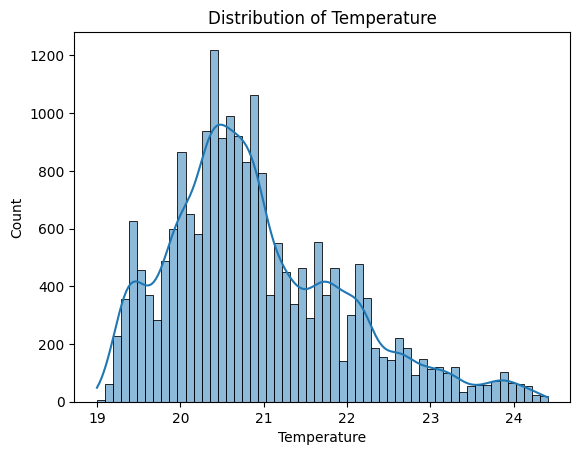

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


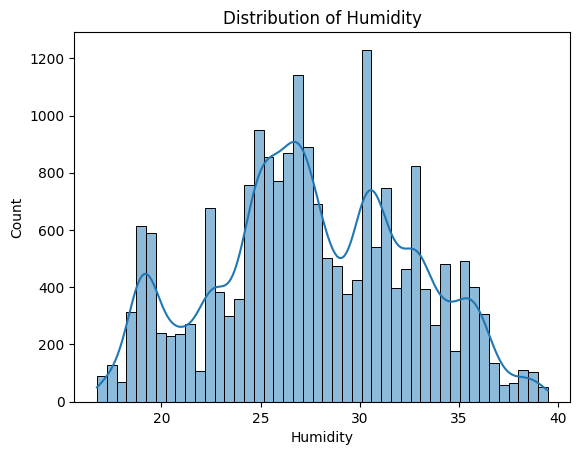

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


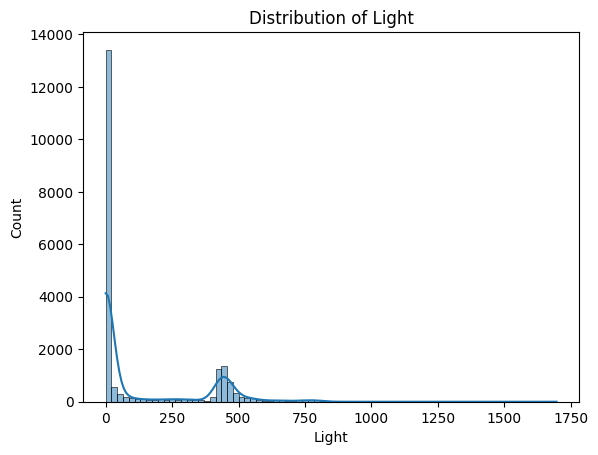

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


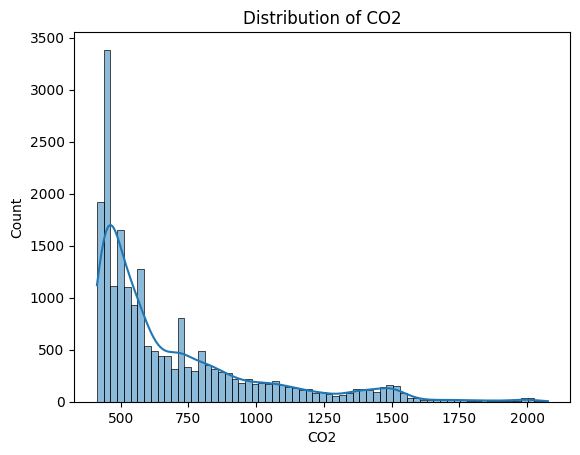

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


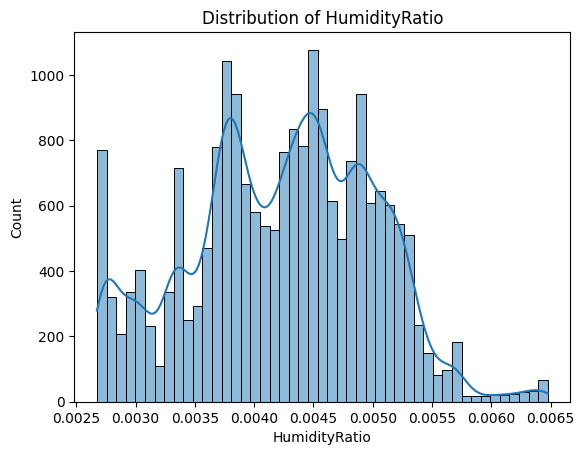

In [9]:
for col in ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Relationships

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

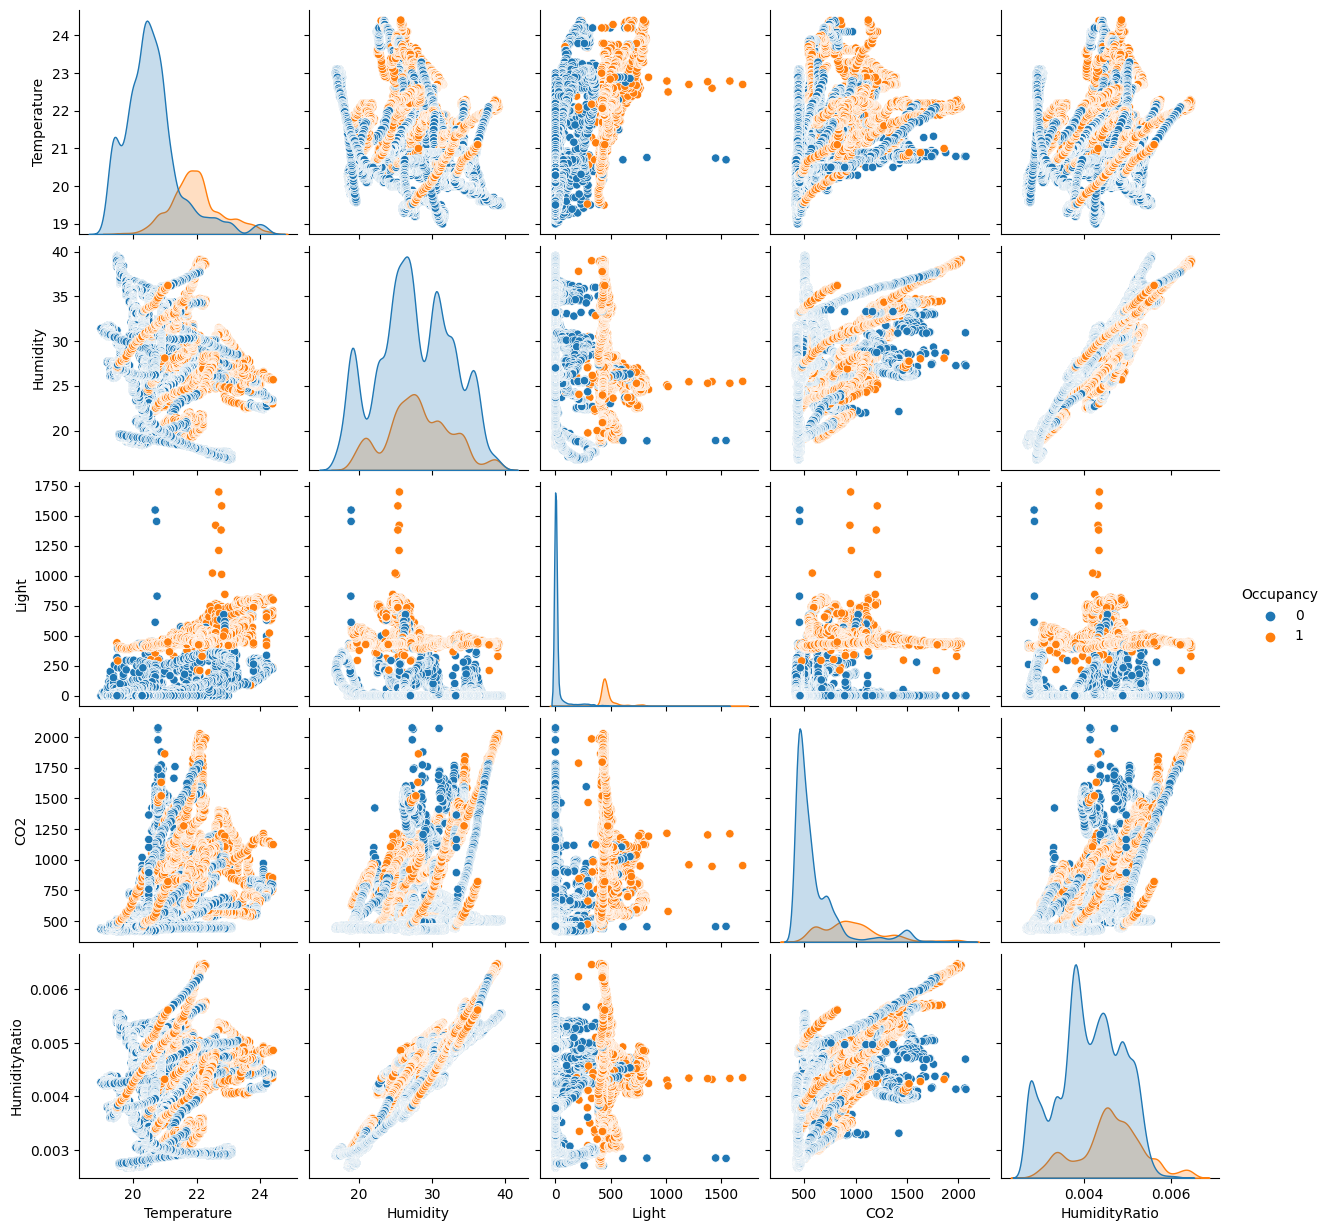

In [18]:
# pair relationships between features
sns.pairplot(df, hue='Occupancy', diag_kind='kde')
plt.show()

**Except with 'Light', features don't have significant pairwise relationships with each other**

## Correlations

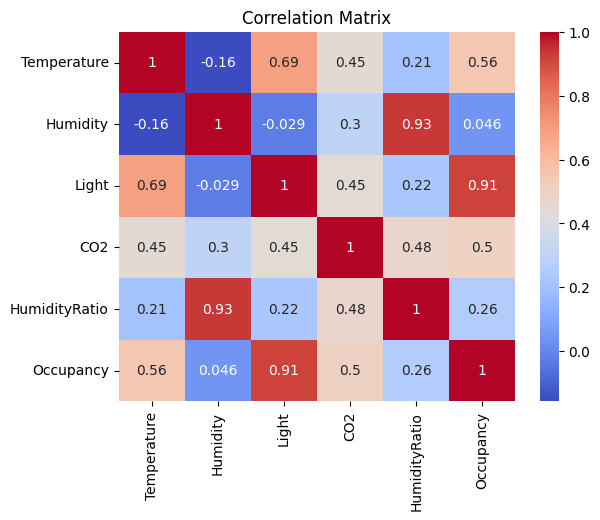

In [23]:
# Compute correlation
correlation_matrix = df.drop(columns=["date"]).corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Outlier Detection

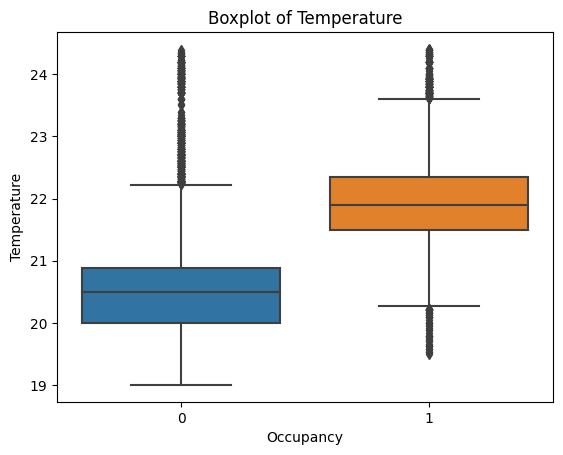

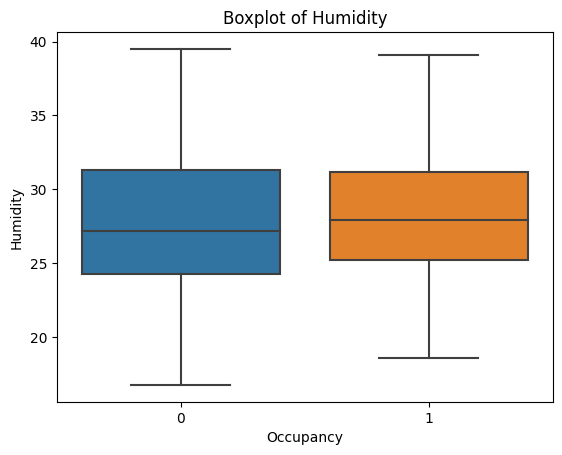

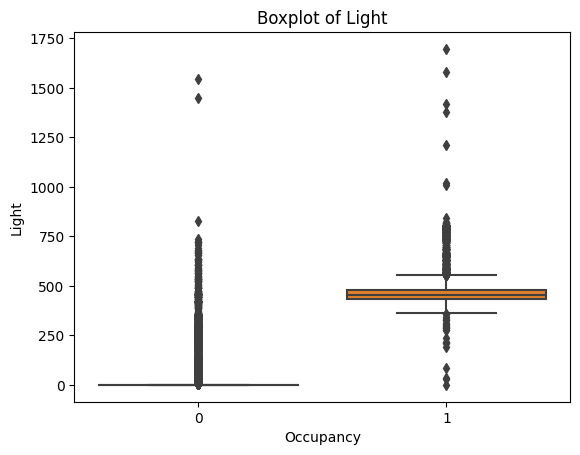

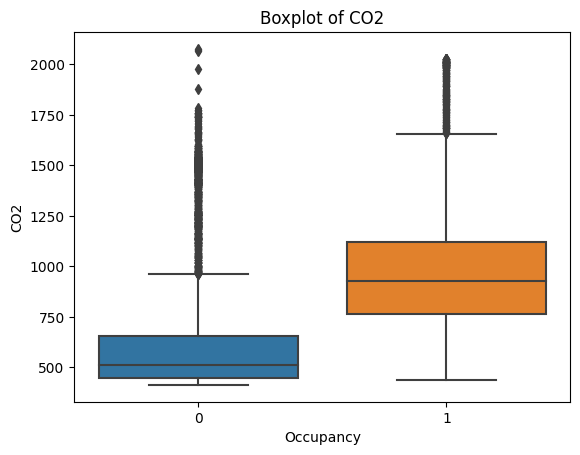

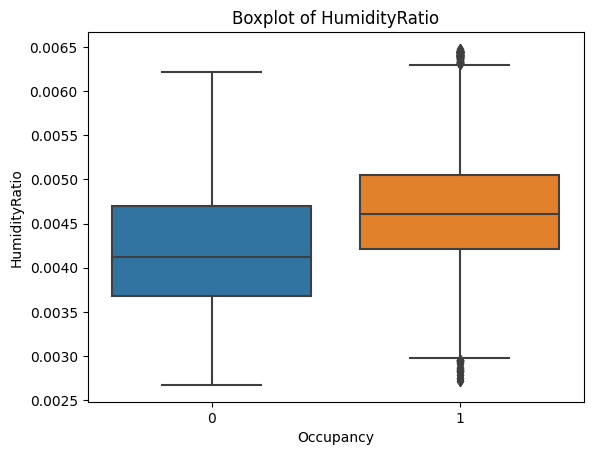

In [29]:
for column in ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']:
    sns.boxplot(data=df, x="Occupancy", y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

**Notes:**
1. Temperature outliers happens due to imbalance. Fix -> balance classes
2. Light is bimodal with highly leptokurtic nature. Fix -> Discretize w/ 2 bins
3. CO2 is highly right skewed. Fix -> Boxcox transform
4. HumidityRatio outliers happens due to imbalance. Fix -> option 1. 

# Data preprocessing

## Date adjustments

In [20]:
df["datetime"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S")
print(df.head())
df.dtypes

                  date  Temperature  Humidity       Light         CO2  \
0  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
3  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
4  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

   HumidityRatio  Occupancy            datetime  
0       0.004764          1 2015-02-02 14:19:00  
1       0.004773          1 2015-02-02 14:19:59  
2       0.004765          1 2015-02-02 14:21:00  
3       0.004744          1 2015-02-02 14:22:00  
4       0.004767          1 2015-02-02 14:23:00  


date                     object
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
datetime         datetime64[ns]
dtype: object

In [21]:
df = df.sort_values(by="datetime", ascending=True, ignore_index=True)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:19:00
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 14:19:59
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 14:21:00
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 14:22:00
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 14:23:00


In [43]:
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
20555,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1,2015-02-18 09:15:00
20556,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1,2015-02-18 09:16:00
20557,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237,1,2015-02-18 09:16:59
20558,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279,1,2015-02-18 09:17:59
20559,2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321,1,2015-02-18 09:19:00


## Time Series Split

In [7]:
from sklearn.model_selection import TimeSeriesSplit

In [22]:
y = df["Occupancy"]
X = df.drop(columns=["date", "Occupancy"])

folds = 5
tscv = TimeSeriesSplit(n_splits = folds)
train_index = [] # List of index lists (i.e. = [[...], [...], ... to n folds])
test_index = []
for i, (train_index_, test_index_) in enumerate(tscv.split(X)):
    train_index.append(train_index_)
    test_index.append(test_index_)
    print(f"Fold {i}:")
    print(f"  Train: index={train_index[i]}")
    print(f"  Test:  index={test_index[i]}")

Fold 0:
  Train: index=[   0    1    2 ... 3427 3428 3429]
  Test:  index=[3430 3431 3432 ... 6853 6854 6855]
Fold 1:
  Train: index=[   0    1    2 ... 6853 6854 6855]
  Test:  index=[ 6856  6857  6858 ... 10279 10280 10281]
Fold 2:
  Train: index=[    0     1     2 ... 10279 10280 10281]
  Test:  index=[10282 10283 10284 ... 13705 13706 13707]
Fold 3:
  Train: index=[    0     1     2 ... 13705 13706 13707]
  Test:  index=[13708 13709 13710 ... 17131 17132 17133]
Fold 4:
  Train: index=[    0     1     2 ... 17131 17132 17133]
  Test:  index=[17134 17135 17136 ... 20557 20558 20559]


## Boxcox transform

In [26]:
from scipy.stats import boxcox

# Transform co2 function
def transform_co2(data, *, trained_lambda=None):
    """
    Transform to fit the best Normal curve possible
    """
    lambda_ = None
    if trained_lambda is None:
        data["CO2"], lambda_ = boxcox(data["CO2"])
    else:
        data["CO2"] = boxcox(data["CO2"], lmbda=trained_lambda)
    return (data, lambda_)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


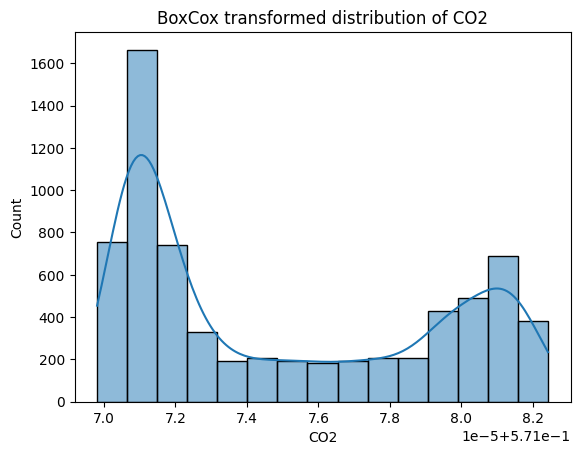

In [27]:
# Example using first fold
_fold_0_train_X, _fold_0_lambda = transform_co2(X.loc[train_index[0]])
_fold_0_test_X, _ = transform_co2(X.loc[test_index[0]], trained_lambda=_fold_0_lambda)

# Vertical joining 
_fold_0_X = pd.concat([_fold_0_train_X, _fold_0_test_X], axis=0)

# plot
sns.histplot(data=_fold_0_X["CO2"], kde=True)
plt.title("BoxCox transformed distribution of CO2")
plt.show()

## Discretize light

**Actual discretization happens at model training level in each k-fold**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


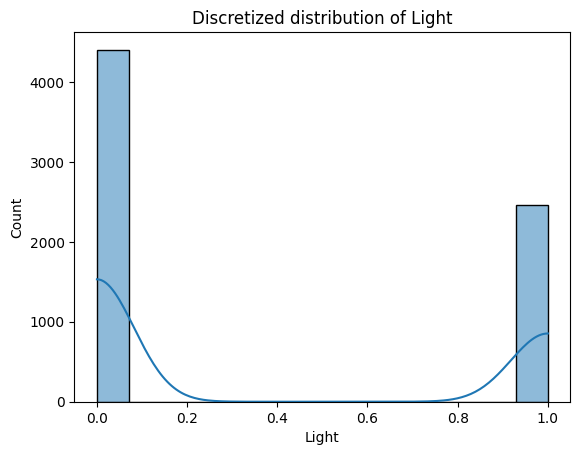

In [28]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=2, encode="ordinal",random_state= 42, strategy="kmeans")

# Example discretization
_fold_0_train_X["Light"] = discretizer.fit_transform(_fold_0_train_X["Light"].to_numpy().reshape(-1, 1))
_fold_0_test_X["Light"] = discretizer.transform(_fold_0_test_X["Light"].to_numpy().reshape(-1, 1))

# Vertical joining 
_fold_0_X = pd.concat([_fold_0_train_X, _fold_0_test_X], axis=0)

# plot
sns.histplot(data=_fold_0_X["Light"], kde=True)
plt.title("Discretized distribution of Light")
plt.show()

## Feature engineering

In [29]:
def engineer_features(data):
    """ 
    Adds the time series related features like delta, rates to dataframe.
    Removes datetime column before returning the dataframe.
    """
    # Time features
    data['hour'] = data['datetime'].dt.hour
    data['day_of_week'] = data['datetime'].dt.dayofweek
    data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
    data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

    # Delta (i.e. Lag) features
    data["co2_delta"] = data["CO2"] - data["CO2"].shift(1)
    data["light_delta"] = data["Light"] - data["Light"].shift(1)
    data["hr_delta"] = data["HumidityRatio"] - data["HumidityRatio"].shift(1)
    data["temp_delta"] = data["Temperature"] - data["Temperature"].shift(1)

    # Rate features
    # rate is defined as difference wrt time elapsed
    # high difference w/ high time elapsed means events are two far apart that difference in feature
    # is negligible
    data["co2_rate"] = data["co2_delta"] / (data['datetime'].diff(periods=1).dt.total_seconds()/60)
    data["light_rate"] = data["light_delta"] / (data['datetime'].diff(periods=1).dt.total_seconds()/60)
    data["hr_rate"] = data["hr_delta"] / (data['datetime'].diff(periods=1).dt.total_seconds()/60)
    data["temp_rate"] = data["temp_delta"] / (data['datetime'].diff(periods=1).dt.total_seconds()/60)

    data.drop(columns=["datetime"], inplace=True)
    data.fillna(0, inplace=True)

    return data

**Actual feature engineering happens at model training level in each k-fold**

In [31]:
# Example feature engineering
_fold_0_train_y = y.loc[train_index[0]]
_fold_0_test_y = y.loc[test_index[0]]

_fold_0_train_X = engineer_features(_fold_0_train_X)
_fold_0_test_X = engineer_features(_fold_0_test_X)

In [35]:
_fold_0_train_X.tail(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,hour,day_of_week,hour_sin,hour_cos,co2_delta,light_delta,hr_delta,temp_delta,co2_rate,light_rate,hr_rate,temp_rate
3420,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,1.984458e-07,0.0,0.000000,0.00,1.951926e-07,0.0,0.000000,0.00
3421,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,-9.861899e-08,0.0,0.000000,0.00,-9.861899e-08,0.0,0.000000,0.00
3422,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,8.635699e-08,0.0,0.000000,0.00,8.635699e-08,0.0,0.000000,0.00
3423,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,-2.618587e-07,0.0,0.000000,0.00,-2.618587e-07,0.0,0.000000,0.00
3424,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,-7.637440e-08,0.0,0.000000,0.00,-7.766888e-08,0.0,0.000000,0.00
3425,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,3.827519e-08,0.0,0.000000,0.00,3.827519e-08,0.0,0.000000,0.00
3426,20.89,23.10,0.0,0.571071,0.003523,6,3,1.0,6.123234e-17,2.136009e-07,0.0,0.000000,0.00,2.100993e-07,0.0,0.000000,0.00
3427,20.89,23.00,0.0,0.571071,0.003508,6,3,1.0,6.123234e-17,9.861899e-08,0.0,-0.000015,0.00,9.861899e-08,0.0,-0.000015,0.00
3428,20.84,23.05,0.0,0.571072,0.003505,6,3,1.0,6.123234e-17,4.886278e-08,0.0,-0.000003,-0.05,4.886278e-08,0.0,-0.000003,-0.05
3429,20.89,23.10,0.0,0.571072,0.003523,6,3,1.0,6.123234e-17,0.000000e+00,0.0,0.000019,0.05,0.000000e+00,0.0,0.000019,0.05


## Oversampling

**Actual oversampling happens at model training level in each k-fold**

In [36]:
from imblearn.over_sampling import SMOTE

# Example resampling
smote = SMOTE(random_state=42)
_fold_0_train_X_resampled, _fold_0_train_y_resampled = smote.fit_resample(_fold_0_train_X, _fold_0_train_y)

### Before resampling for fold 1

In [38]:
_fold_0_train_y.value_counts()

Occupancy
0    2442
1     988
Name: count, dtype: int64

### After resampling for fold 1

In [39]:
_fold_0_train_y_resampled.value_counts()

Occupancy
1    2442
0    2442
Name: count, dtype: int64

# Models

In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df_sorted['Occupancy']
X = df_sorted.drop(columns=['Occupancy', 'date', 'datetime', 'Light', 'light_delta', 'light_rate'], axis=1).fillna(0)

In [23]:
X.head()

,Temperature,Humidity,CO2,HumidityRatio,hour,day_of_week,hour_sin,hour_cos,co2_delta,hr_delta,temp_delta,time_diff,co2_rate,hr_rate,temp_rate
0,23.7000,26.272,749.200000,0.004764,14,0,-0.5,-0.866025,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000
1,23.7180,26.290,760.400000,0.004773,14,0,-0.5,-0.866025,11.200000,0.000008,0.0180,59.0,11.389831,0.000009,0.018305
2,23.7300,26.230,769.666667,0.004765,14,0,-0.5,-0.866025,9.266667,-0.000008,0.0120,61.0,9.114754,-0.000007,0.011803
3,23.7225,26.125,774.750000,0.004744,14,0,-0.5,-0.866025,5.083333,-0.000021,-0.0075,60.0,5.083333,-0.000021,-0.007500
4,23.7540,26.200,779.000000,0.004767,14,0,-0.5,-0.866025,4.250000,0.000023,0.0315,60.0,4.250000,0.000023,0.031500


In [24]:
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
print("XGB importances\n========================")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {xgb_model.feature_importances_[i]:.3f}")
print("\n\nRF importances\n=======================")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {rf_model.feature_importances_[i]:.3f}")

XGB importances
Temperature: 0.175
Humidity: 0.020
CO2: 0.045
HumidityRatio: 0.016
hour: 0.120
day_of_week: 0.225
hour_sin: 0.004
hour_cos: 0.352
co2_delta: 0.006
hr_delta: 0.007
temp_delta: 0.007
time_diff: 0.005
co2_rate: 0.007
hr_rate: 0.004
temp_rate: 0.004


RF importances
Temperature: 0.176
Humidity: 0.046
CO2: 0.167
HumidityRatio: 0.052
hour: 0.117
day_of_week: 0.122
hour_sin: 0.038
hour_cos: 0.207
co2_delta: 0.022
hr_delta: 0.012
temp_delta: 0.005
time_diff: 0.002
co2_rate: 0.018
hr_rate: 0.011
temp_rate: 0.006


# Evaluation

In [27]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(X_test)
print("XGB Classifier\n===============================")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")

print("\n\nRF Classifier\n===============================")
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.4f}")

XGB Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4754
           1       0.97      0.98      0.97      1414

    accuracy                           0.99      6168
   macro avg       0.98      0.98      0.98      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9880
ROC-AUC: 0.9983


RF Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4754
           1       0.98      0.96      0.97      1414

    accuracy                           0.99      6168
   macro avg       0.98      0.98      0.98      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9864
ROC-AUC: 0.9982


### Cross validation

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def cross_validate(model, model_name, X, y):
    print(f"Cross validating {model_name}\n====================================")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print("\n")

models = [xgb_model, rf_model]
model_names = ["XGB", "RF"]
for model, model_name in zip(models, model_names):
    cross_validate(model, model_name, X, y)

Cross validating XGB
Cross-Validation Scores: [0.98978599 0.98881323 0.98662451 0.98565175 0.99124514]
Mean Accuracy: 0.9884


Cross validating RF
Cross-Validation Scores: [0.9868677  0.98638132 0.98613813 0.9868677  0.9895428 ]
Mean Accuracy: 0.9872




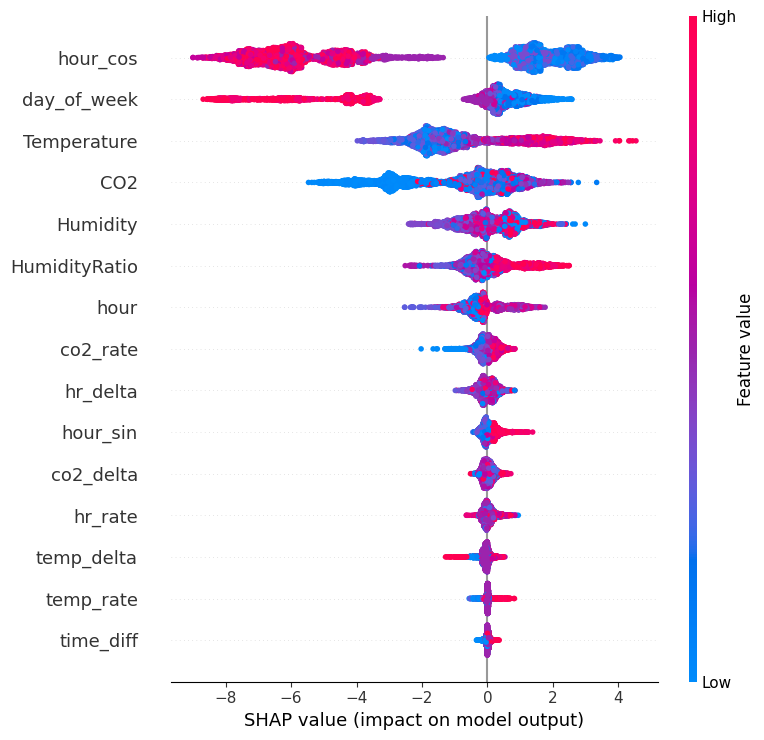

TypeError: only integer scalar arrays can be converted to a scalar index

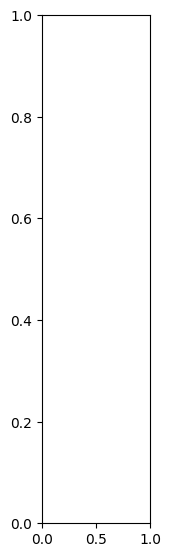

In [29]:
import shap

for model in models:
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
    plt.show()